### PCA - Introduction

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataframe of varience in three key soil nutrients.

In [185]:
# Make a toy dataset with 3 metrics, 100 samples
X, y = make_blobs(n_samples=100, centers=20, n_features=3, cluster_std=30.0, random_state=100, shuffle=True)


sklearn.datasets.make_blobs(n_samples=100, n_features=5, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)¶

In [186]:
# Prepare the array in a DataFrame
col_name = ['Phosphate', 'Nitrogen', 'Potassium']
df = pd.DataFrame(X, columns=col_name)

df.head()

,Phosphate,Nitrogen,Potassium
0,14.030861,-9.499166,-56.634500
1,11.049080,19.809582,37.720413
2,-34.481669,-43.352121,5.258961
3,-11.700793,21.551279,-13.140493
4,-45.706561,-9.519647,-16.176704


In [187]:
df = df.abs()
df.head()

,Phosphate,Nitrogen,Potassium
0,14.030861,9.499166,56.634500
1,11.049080,19.809582,37.720413
2,34.481669,43.352121,5.258961
3,11.700793,21.551279,13.140493
4,45.706561,9.519647,16.176704


In [181]:
df['Site'] = y
df['Site'] = 'Site_' + df['Site'].astype(str)


In [203]:
df.to_csv('file_name.csv')

In [219]:
df = pd.read_csv('../Datasets/PCA_intro.csv')

In [220]:
df.describe()

,Prot_1,Prot_2,Prot_3
count,100.000000,100.000000,100.000000
mean,25.319500,27.387100,12.230400
std,18.631773,32.823819,19.686194
min,0.400000,0.020000,0.520000
25%,9.995000,4.615000,1.217500
50%,20.210000,14.980000,2.825000
75%,40.435000,35.275000,12.847500
max,70.380000,163.640000,91.040000


Look at all the dimensions

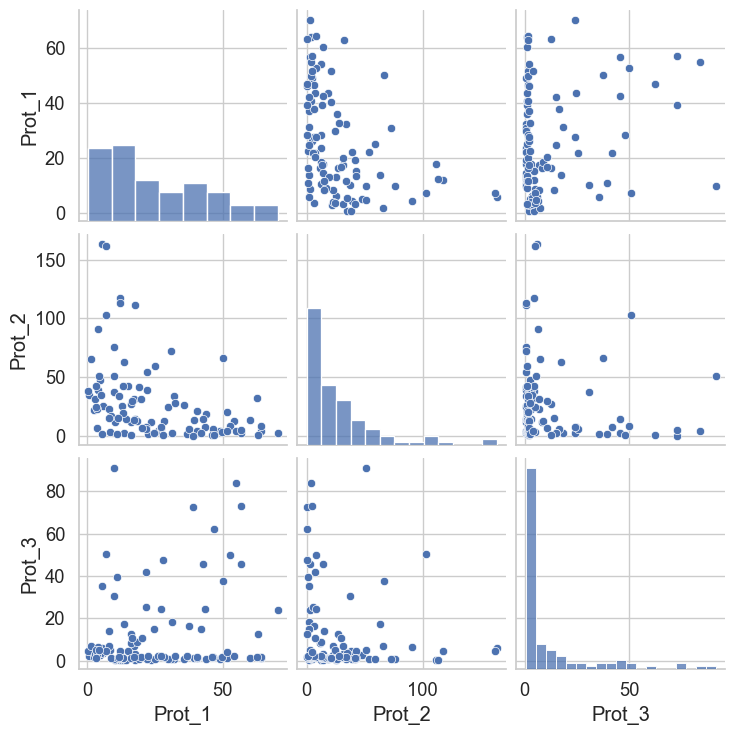

In [221]:
sns.pairplot(df);

Which axes capture most variation in the dataframe?  
Could the most variation be along an axe which is a COMBINATION of the three metrics?

Plot in three D for Phosphate, Potassium and Nitrogen

In [223]:
fig = px.scatter_3d(df, x='Prot_1', y='Prot_2', z='Prot_3',
              template='simple_white')
fig.show()

Rotate the plot to look for an orientation which captures the most variation.  This will be the new first axes (PC1), and the line orthogonal to it will be the new second axes (PC2)

#### Using PCA to reduce the dimensions

In [225]:
from sklearn.decomposition import PCA
# Perform PCA (w/o limits on n_components)
pca = PCA()
principalComponents = pca.fit_transform(df)
PC_components = np.arange(pca.n_components_) + 1

In [227]:
PC_components

array([1, 2, 3])

In [228]:
# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=principalComponents)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca.head()

,PC1,PC2,PC3
0,15.414938,-15.706023,-16.513652
1,18.589078,-12.686157,-16.947062
2,2.629648,-18.158986,-17.687640
3,-12.125913,-21.111522,-20.644842
4,18.192966,-12.859823,-12.907837


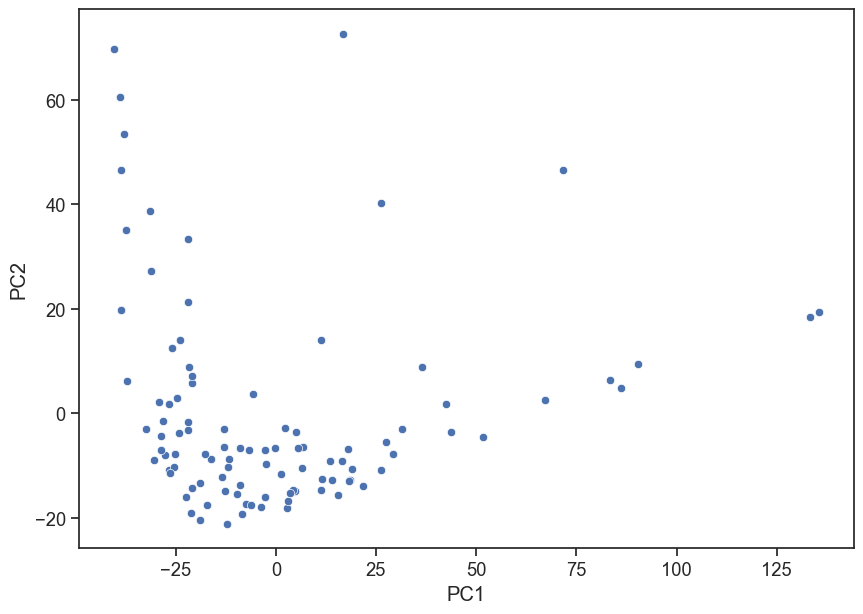

In [229]:
# Plot Principal Component
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2');


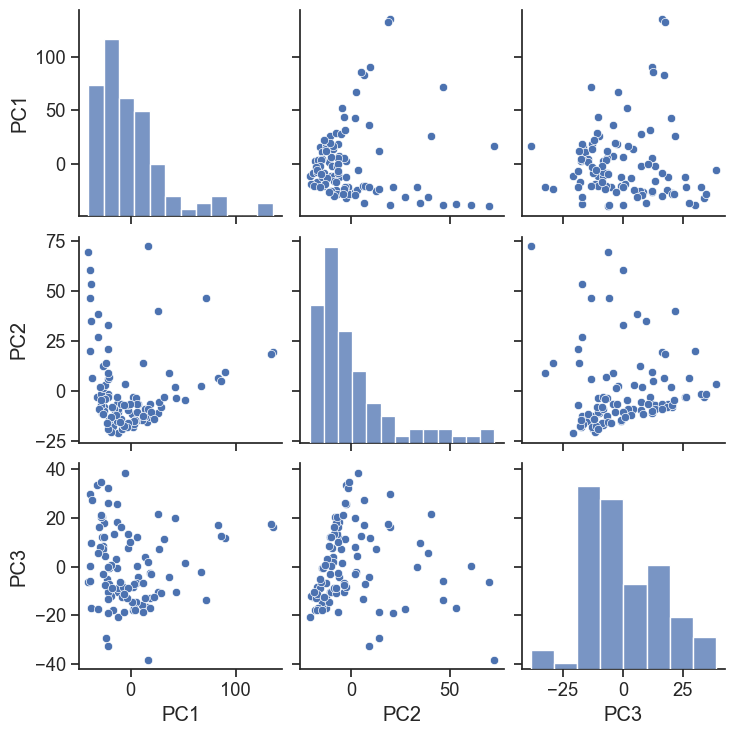

In [230]:
sns.pairplot(df_pca);

3D plot of first 3 PCA?

In [196]:
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
              template='simple_white')
fig.show()

Better spread of data?

#### How much varaiton is explained by each PCA?

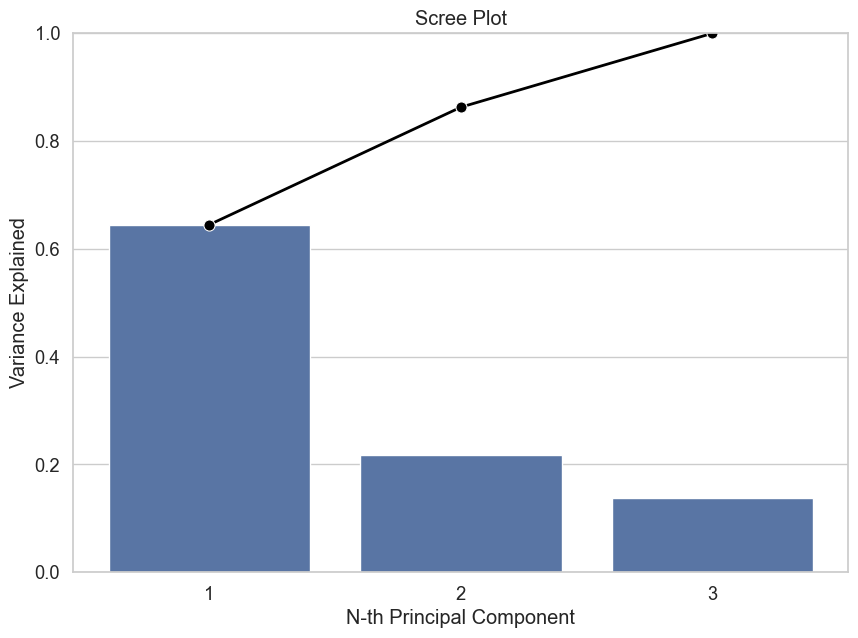

In [231]:
# Scree Plot
sns.set(style='whitegrid', font_scale=1.2);
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b');
sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8);

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

#### How much of each dimension contributes to each PCA?

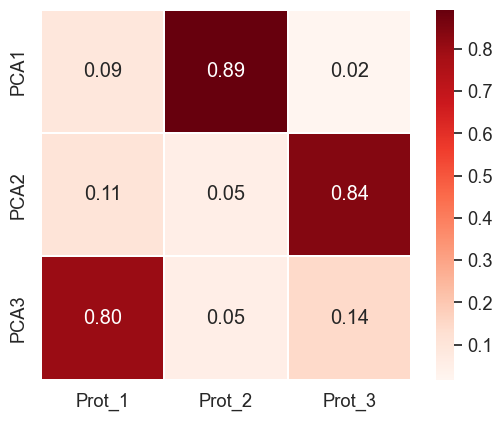

In [233]:
# Feature Weight
sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(df),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cmap = "Reds",
                 cbar_kws={"orientation": "vertical"});